# Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Coleta dos dados

In [2]:
df = pd.read_csv("../kaggle/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Descrição dos dados

    "Obesity Levels" é um conjunto de dados que contém informações sobre características demográficas, hábitos alimentares, histórico familiar e níveis de atividade física de indivíduos, com foco na classificação da obesidade. O conjunto de dados consiste em 17 variáveis:

        1. Age: Representa a idade do indivíduo. Esta variável é quantitativa e contínua.
        2. Gender: Indica o gênero do indivíduo (masculino/feminino). Esta variável é qualitativa e nominal.
        3. Height: Refere-se à altura do indivíduo em metros. Esta variável é quantitativa e contínua.
        4. Weight: Indica o peso do indivíduo em quilogramas. Esta variável é quantitativa e contínua.
        5. CALC: Representa a frequência do consumo de álcool pelo indivíduo. Esta variável é qualitativa e nominal.
        6. FAVC: Indica a frequência do consumo de alimentos com alto teor calórico pelo indivíduo. Esta variável é qualitativa e nominal.
        7. FCVC: Refere-se à frequência do consumo de vegetais pelo indivíduo. Esta variável é quantitativa e discreta.
        8. NCP: Indica o número de refeições principais do indivíduo. Esta variável é quantitativa e discreta.
        9. SCC: Indica se o indivíduo realiza monitoração das calorias consumidas diariamente. Esta variável é qualitativa e nominal.
        10. SMOKE: Indica se o indivíduo é fumante. Esta variável é qualitativa e nominal.
        11. CH2O: Representa o consumo de água do indivíduo em litros. Esta variável é quantitativa e contínua.
        12. family_history_with_overweight: Indica se o indivíduo possui histórico familiar de sobrepeso. Esta variável é qualitativa e nominal.
        13. FAF: Refere-se ao tempo gasto em atividades físicas pelo indivíduo em horas. Esta variável é quantitativa e contínua.
        14. TUE: Indica o tempo gasto em dispositivos tecnológicos, como celulares, em horas. Esta variável é quantitativa e contínua.
        15. CAEC: Representa o consumo de comida entre as refeições (café da manhã, almoço, jantar) pelo indivíduo. Esta variável é qualitativa e nominal.
        16. MTRANS: Indica o meio de transporte usado regularmente pelo indivíduo. Esta variável é qualitativa e nominal.
        17. NObeyesdad: Refere-se à classificação de obesidade do indivíduo. Esta variável é qualitativa e ordinal.

    Esses dados são fundamentais para entender os fatores associados à obesidade e são frequentemente utilizados em tarefas de aprendizado de máquina supervisionado para desenvolver algoritmos de análise de dados relacionados à saúde e estilo de vida.

## Distribuição dos dados

In [3]:
df.describe(include='all')

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,NaN,2,NaN,NaN,4,2,NaN,NaN,2,2,NaN,2,NaN,NaN,4,5,7
top,NaN,Male,NaN,NaN,Sometimes,yes,NaN,NaN,no,no,NaN,yes,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,NaN,1068,NaN,NaN,1401,1866,NaN,NaN,2015,2067,NaN,1726,NaN,NaN,1765,1580,351
mean,24.312600,NaN,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,6.345968,NaN,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,14.000000,NaN,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,19.947192,NaN,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,22.777890,NaN,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,26.000000,NaN,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

    Não há dados faltantes.

## Dicionário de dados

In [5]:
dicionario = pd.DataFrame([
    {
        "variavel": "Age",
        "descricao": "Idade do indíviduo",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "Gender",
        "descricao": "Gênero do indíviduo (male/female)",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "Height",
        "descricao": "Altura do indíviduo (em metros)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "Weight",
        "descricao": "Peso do indíviduo (em quilogramas)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "CALC",
        "descricao": "Frequência do consumo de álcool do indíviduo",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "FAVC",
        "descricao": "Frequência do consumo de alimentos com alto índice calórico",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "FCVC",
        "descricao": "Frequencia do consumo de vegetais do indivíduo",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "NCP",
        "descricao": "Número de refeições principais do indivíduo",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "SCC",
        "descricao": "Se o indivíduo realiza monitoração das calorias consumidas diariamentes",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "SMOKE",
        "descricao": "Se o indivíduo é fumante",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "CH2O",
        "descricao": "Consumo de água do indivíduo (em litros)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "family_history_with_overweight",
        "descricao": "Histórico familiar de sobrepeso",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "FAF",
        "descricao": "Tempo gasto em atividades físicas (em horas)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "TUE",
        "descricao": "Tempo gasto em dispositivos tecnológicos, como celulares e outros (em horas)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "CAEC",
        "descricao": "Consumo de comida entre as refeições (café da manhã, almoço, jantar)",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "MTRANS",
        "descricao": "Meio de transporte usado regularmente",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "NObeyesdad",
        "descricao": "Classificação de obesidade",
        "tipo": "qualitativa",
        "subtipo": "ordinal"
    }
])

dicionario.to_csv('../data/external/dictionary.csv', index=False)
dicionario

,variavel,descricao,tipo,subtipo
0,Age,Idade do indíviduo,quantitativa,contínua
1,Gender,Gênero do indíviduo (male/female),qualitativa,nominal
2,Height,Altura do indíviduo (em metros),quantitativa,contínua
3,Weight,Peso do indíviduo (em quilogramas),quantitativa,contínua
4,CALC,Frequência do consumo de álcool do indíviduo,qualitativa,nominal
5,FAVC,Frequência do consumo de alimentos com alto ín...,qualitativa,nominal
6,FCVC,Frequencia do consumo de vegetais do indivíduo,quantitativa,discreta
7,NCP,Número de refeições principais do indivíduo,quantitativa,discreta
8,SCC,Se o indivíduo realiza monitoração das caloria...,qualitativa,nominal
9,SMOKE,Se o indivíduo é fumante,qualitativa,nominal


## Perguntas de partida e hipóteses

    1. Correlação entre idade e nível de obesidade.
    2. Diferença de gênero na prevalência de obesidade.  
    3. Impacto do consumo de álcool e tabagismo na obesidade.  
    4. Relação entre altura, peso e obesidade.  
    5. Influência do histórico familiar de sobrepeso.  
    6. Associação entre hábitos alimentares e obesidade.  
    7. Atividade física e obesidade.  
    8. Tempo gasto em dispositivos tecnológicos e obesidade.

## 1. Correlação entre idade e nível de obesidade

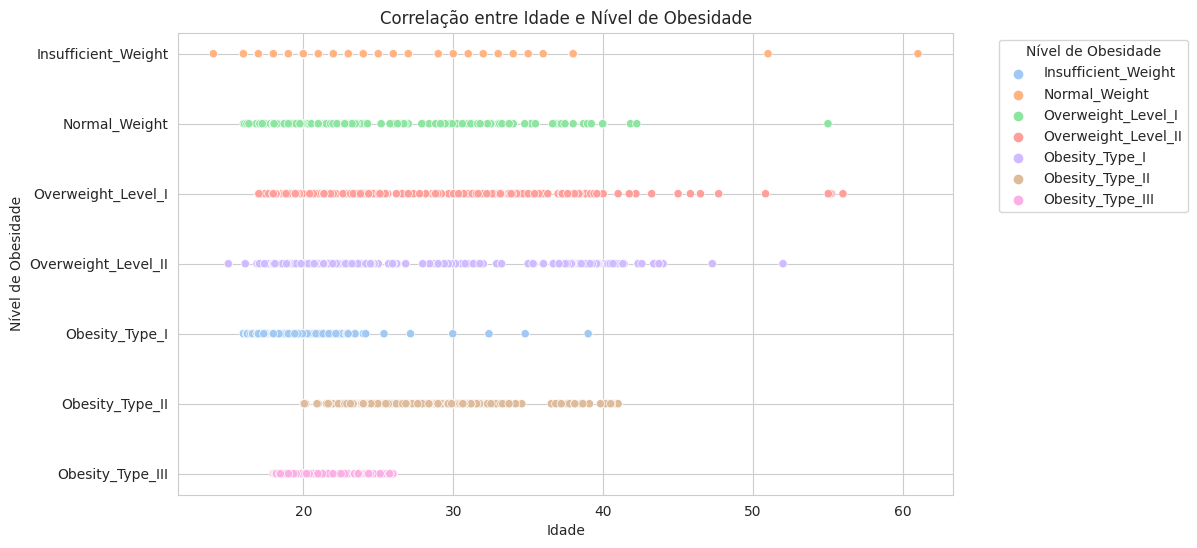

In [50]:
categorias = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
cores = sns.color_palette("pastel", len(categorias))
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='NObeyesdad', hue='NObeyesdad', hue_order=categorias, palette=cores)
plt.title('Correlação entre Idade e Nível de Obesidade')
plt.xlabel('Idade')
plt.ylabel('Nível de Obesidade')
plt.yticks(ticks=range(len(categorias)), labels=categorias)
plt.legend(title='Nível de Obesidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Os padrões identificados na distribuição da obesidade em relação à faixa etária revelam correlações importantes. A insuficiência de peso, apesar de baixa, é mais frequente em indivíduos de 16 a 36 anos, com algumas pequenas exceções. Indivíduos com peso considerado normal tendem a estar na faixa etária de 17 a 40 anos, com algumas exceções entre os 50 e 60 anos. O sobrepeso nível I é mais prevalente entre os 20 e 40 anos, enquanto o sobrepeso nível II é comum entre os indivíduos de 18 a 44 anos. A obesidade tipo I é observada principalmente em pessoas entre 20 e 45 anos. Por outro lado, a obesidade tipo II é comum entre a faixa etária de 20 a 40, assim como a obesidade tipo III. Essas tendências destacam a importância de abordagens específicas para diferentes faixas etárias na prevenção e no tratamento da obesidade, enfatizando a necessidade de promover hábitos saudáveis ao longo de toda a vida.

## Insights